In [1]:
!pip install bitsandbytes accelerate diffusers

In [2]:
!pip install accelerate

In [3]:
from pymystem3 import Mystem

mystem = Mystem()

In [4]:
text = """
Американская компания Fisker, основанная в 2016 году датским автомобильным дизайнером и предпринимателем Хенриком Фискером, еще несколько лет назад позиционировалась как конкурент Tesla и других электромобильных стартапов (таких как Lucid и Rivian). Однако неполадки с программным обеспечением кроссовера Ocean — единственной модели, которую смогла выпустить Fisker, — а также низкое качество сервиса и хаотичный стиль руководства привели компанию к краху. По оценкам конца 2023 года, ее убытки составляли 1,3 миллиарда долларов. «Медуза» рассказывает, почему, несмотря на амбициозные планы, проект Фискера провалился.
"""

In [5]:
words_analyzed = mystem.analyze(text)

In [6]:
gr_good = []

for w in words_analyzed:
  try:
    a = w['analysis']
    if a != []:
      gr_good.append(w)
  except:
    pass

In [7]:
analysis_list = []

for w in gr_good:
  a = w['analysis']
  if len(a) == 1:
    analysis_list.append(a[0])
  else:
    print(a)

In [8]:
pos = [x["gr"].split("=")[0].split(",")[0] for x in analysis_list]

In [9]:
from collections import Counter

c = Counter(pos)
c

Counter({'A': 9,
         'S': 29,
         'V': 8,
         'PR': 5,
         'CONJ': 7,
         'ADV': 4,
         'NUM': 1,
         'APRO': 4,
         'ADVPRO': 2})

In [10]:
words_with_S = []

for w in analysis_list:
  if w["gr"].startswith("S"):
    words_with_S.append(w["lex"])
print(len(words_with_S))

29


In [11]:
round(29 / len(pos), 2) * 100

42.0

In [12]:
import numpy as np

In [13]:
multiclass_true = [0,3,0,0,3,0,0,1,2,4,1,2,4,0,2,0,4,1,2,4,1,1,4,1,2,0]

In [14]:
probas = np.array([[0.14283307, 0.69125398, 0.08801677, 0.05890497, 0.01899121],
       [0.05017326, 0.16837714, 0.09787715, 0.37586925, 0.3077032 ],
       [0.07349622, 0.20737874, 0.06666821, 0.0582571 , 0.59419973],
       [0.08704361, 0.18970222, 0.16262277, 0.08630088, 0.47433053],
       [0.16137361, 0.21450292, 0.22870402, 0.24422044, 0.151199  ],
       [0.268094  , 0.43761478, 0.12385365, 0.04917541, 0.12126215],
       [0.27161954, 0.01412896, 0.11056462, 0.09468905, 0.50899783],
       [0.09363269, 0.02693918, 0.33977914, 0.39909705, 0.14055195],
       [0.29520778, 0.05132426, 0.06673668, 0.45254433, 0.13418695],
       [0.15421375, 0.22964685, 0.16662999, 0.21004033, 0.23946907],
       [0.24755032, 0.24628846, 0.12956078, 0.24832473, 0.12827571],
       [0.11797719, 0.03232272, 0.07293219, 0.52455883, 0.25220907],
       [0.75835945, 0.07189134, 0.06032446, 0.04986686, 0.05955789],
       [0.02601848, 0.26673495, 0.03124844, 0.21992134, 0.4560768 ],
       [0.58059452, 0.03148405, 0.11400383, 0.14452069, 0.12939691],
       [0.08215579, 0.32887402, 0.10776154, 0.30880314, 0.17240552],
       [0.11467395, 0.07250172, 0.03868279, 0.04358503, 0.73055651],
       [0.09546111, 0.22318028, 0.04797582, 0.42230537, 0.21107742],
       [0.17088269, 0.31617363, 0.02329777, 0.26480448, 0.22484143],
       [0.1573525 , 0.04416687, 0.59056588, 0.0854817 , 0.12243306],
       [0.16300152, 0.224168  , 0.11143585, 0.09995103, 0.4014436 ],
       [0.17649215, 0.32146966, 0.21575183, 0.0238604 , 0.26242596],
       [0.00860468, 0.01201256, 0.96059244, 0.00327634, 0.01551398],
       [0.06455855, 0.11772163, 0.25971348, 0.32510222, 0.23290411],
       [0.04150647, 0.1329052 , 0.22146507, 0.03930956, 0.5648137 ],
       [0.12671909, 0.01486602, 0.77637796, 0.06239952, 0.01963741]])

In [15]:
preds = [x.argmax() for x in probas]
preds

[1, 3, 4, 4, 3, 1, 4, 3, 3, 4, 3, 3, 0, 4, 0, 1, 4, 3, 1, 2, 4, 1, 2, 3, 4, 2]

In [16]:
from sklearn.metrics import f1_score

In [17]:
round(f1_score(multiclass_true, preds, average="macro", zero_division=0), 2)

0.18

In [18]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [19]:
from PIL import Image
import requests

image_url = "https://i.ibb.co/fYQkR4L/Ewl-AFp-TWUAA0-GEu.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
text = "собака повар готовит сырники"

In [20]:
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
print(logits_per_image)

tensor([[28.7957]], grad_fn=<TBackward0>)


In [21]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float32,
        bnb_4bit_use_double_quant=True
    )

In [22]:
name = "microsoft/Phi-3-mini-4k-instruct"

model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=name,
                                             quantization_config=quantization_config,
                                             device_map='auto',
                                             cache_dir='./models')
tokenizer = AutoTokenizer.from_pretrained(name)

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [23]:
content =  "Tell me a joke about natural language processing?"

batch = tokenizer(content, return_tensors='pt').to('cuda')
output_tokens = model.generate(**batch, max_new_tokens=38, do_sample=False, no_repeat_ngram_size=2)
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True))

You are not running the flash-attention implementation, expect numerical differences.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:426: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


Tell me a joke about natural language processing?

- answer: Why did the machine learning model break up with natural languages? Because it felt it needed more data to understand the complexities of human communication!
*
This jo


In [30]:
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True))

Tell me a joke about natural language processing?

- answer: Why did the machine learning model break up with natural languages? Because it felt it needed more data to understand the complexities of human communication!
*
This jo


In [26]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, StableDiffusionXLPipeline
from diffusers.utils import load_image
from PIL import Image
from torchvision import transforms
to_512 = transforms.Resize(512)

In [27]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
_ = pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [28]:
prompt = 'a colorful English letter'
negative_prompt = 'blurry, bad quality, unreadable'
generator = generator=torch.Generator('cuda').manual_seed(1231473)

gen_image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    generator=generator,
    guidance_scale=10.0,
    width=768,
    height=1024,
    num_inference_steps=16
).images[0]

  0%|          | 0/16 [00:00<?, ?it/s]

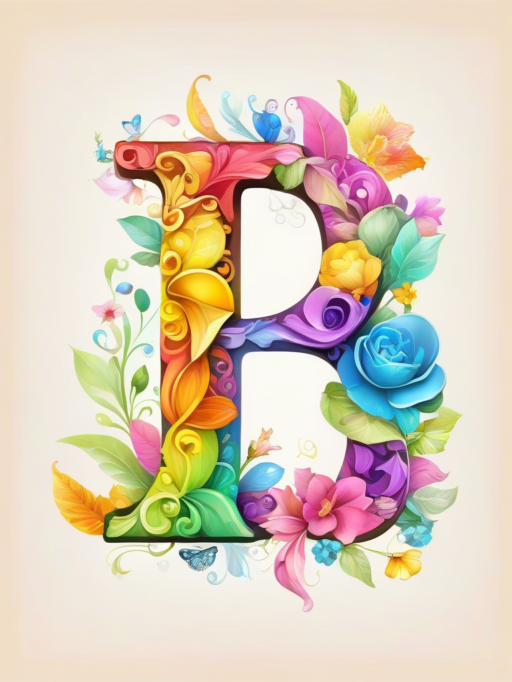

In [29]:
to_512(gen_image)